# Module 7: Spark Streaming

# Introduction

This module covers processing of streaming data using Spark Streaming.

# Learning Outcomes

In this module, you will 

* Become familiar with Spark Streaming
* Build more hands-on skills with Spark

# Readings and Resources

We invite you to explore the following official Spark documentation, and also supplement this notebook with examples available on GitHub as listed below.

**Official Spark Documentation**:

* https://spark.apache.org/


* https://spark.apache.org/docs/latest/


* https://spark.apache.org/streaming/


**Examples on GitHub**:

* https://github.com/apache/spark/tree/master/examples/src/main/python/streaming


* https://github.com/apache/spark/tree/master/examples/src/main/python


<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-7:-Spark-Streaming" data-toc-modified-id="Module-7:-Spark-Streaming">Module 7: Spark Streaming</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
<li><span><a href="#Streaming-Data" data-toc-modified-id="Streaming-Data">Streaming Data</a></span>
<ul class="toc-item">
<li><span><a href="#What-is-streaming-data?" data-toc-modified-id="What-is-streaming-data?">What is streaming data?</a></span>
</li>
<li><span><a href="#How-is-streaming-data-different-than-tabular-data?" data-toc-modified-id="How-is-streaming-data-different-than-tabular-data?">How is streaming data different than tabular data?</a></span>
</li>
</ul>
</li>
<li><span><a href="#Stream-processing" data-toc-modified-id="Stream-processing">Stream processing</a></span>
<ul class="toc-item">
<li><span><a href="#One-at-a-time-processing" data-toc-modified-id="One-at-a-time-processing">One-at-a-time processing</a></span>
</li>
<li><span><a href="#Problems-with-the-one-at-a-time-approach" data-toc-modified-id="Problems-with-the-one-at-a-time-approach">Problems with the one-at-a-time approach</a></span>
</li>
<li><span><a href="#Micro-batch-processing" data-toc-modified-id="Micro-batch-processing">Micro-batch processing</a></span>
</li>
</ul>
</li>
<li><span><a href="#Spark-Streaming" data-toc-modified-id="Spark-Streaming">Spark Streaming</a></span>
<ul class="toc-item">
<li><span><a href="#Developing-and-running-Structured-Streaming-queries" data-toc-modified-id="Developing-and-running-Structured-Streaming-queries">Developing and running Structured Streaming queries</a></span>
<ul class="toc-item">
<li><span><a href="#Defining-inputs" data-toc-modified-id="Defining-inputs">Defining inputs</a></span>
</li>
<li><span><a href="#Defining-transformations" data-toc-modified-id="Defining-transformations">Defining transformations</a></span>
</li>
<li><span><a href="#Defining-outputs" data-toc-modified-id="Defining-outputs">Defining outputs</a></span>
</li>
<li><span><a href="#Specifying-the-trigger-rules" data-toc-modified-id="Specifying-the-trigger-rules">Specifying the trigger rules</a></span>
</li>
<li><span><a href="#Running-the-query" data-toc-modified-id="Running-the-query">Running the query</a></span>
</li>
</ul>
</li>
<li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1">Exercise 1</a></span>
</li>
<li><span><a href="#Exactly-once-guarantees" data-toc-modified-id="Exactly-once-guarantees">Exactly-once guarantees</a></span>
</li>
<li><span><a href="#Custom-sources-and-sinks" data-toc-modified-id="Custom-sources-and-sinks">Custom sources and sinks</a></span>
</li>
<li><span><a href="#Transformations" data-toc-modified-id="Transformations">Transformations</a></span>
<ul class="toc-item">
<li><span><a href="#Stateless-Transformations" data-toc-modified-id="Stateless-Transformations">Stateless Transformations</a></span>
</li>
<li><span><a href="#Stateful-Transformations" data-toc-modified-id="Stateful-Transformations">Stateful Transformations</a></span>
<ul class="toc-item">
<li><span><a href="#Stateful-Streaming-Aggregations" data-toc-modified-id="Stateful-Streaming-Aggregations">Stateful Streaming Aggregations</a></span>
</li>
<li><span><a href="#Watermarks" data-toc-modified-id="Watermarks">Watermarks</a></span>
</li>
</ul>
</li>
<li><span><a href="#Streaming-Joins" data-toc-modified-id="Streaming-Joins">Streaming Joins</a></span>
<ul class="toc-item">
<li><span><a href="#Stream-static-joins" data-toc-modified-id="Stream-static-joins">Stream-static joins</a></span>
</li>
<li><span><a href="#Stream-stream-joins" data-toc-modified-id="Stream-stream-joins">Stream-stream joins</a></span>
</li>
</ul>
</li>
<li><span><a href="#Arbitrary-stateful-computations" data-toc-modified-id="Arbitrary-stateful-computations">Arbitrary stateful computations</a></span>
</li>
</ul>
</li>
<li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2">Exercise 2</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Streaming Data

## What is streaming data?

**Streaming data** is data that doesn't have a fixed size &mdash; i.e. it's data arriving from some source that continually generates new data and where we want to use that data almost immediately when it arrives.  Some examples:

- A Twitter feed
- A stock price feed
- Real-time store sales
- Noxious gas monitoring from an underground mine
- Network intrusion monitoring data
- Real-time delivery truck location monitoring

## How is streaming data different than tabular data?

The tricky thing about streaming data is that operations that are well-defined on fixed-sized data, such as taking the sum or the largest, become a function of time, rather than being a fixed quantity.  Some such operations can easily be computed on an incremental basis.  For example, sum, max and mean can all be easily calculated for $n + 1$ observations, given their value for the previous $n$ observations and the value of the new observation.  Others, such as median require keeping all the previous observations or in some cases settling for approximations (which often require clever algorithms).  Often when we are processing streaming data we are interested in near-realtime analysis, and if the data is *big*, doing a re-computation over the entire stream from its beginning as each new datapoint arrives would take so long as be completely impractical.

# Stream processing
## One-at-a-time processing

To begin with, let's talk about the pre-Spark approach to dealing with streaming data. The traditional approach was to process the arriving records one-at-a-time. This is the simplest approach and seems to be a natural way to process streaming data. If we were, for example, tracking and displaying real-time sales information across many stores, we could simply update the dashboard as each new purchase occurred. This is fine if the data arrival rates never exceed the speed at which we can process them.

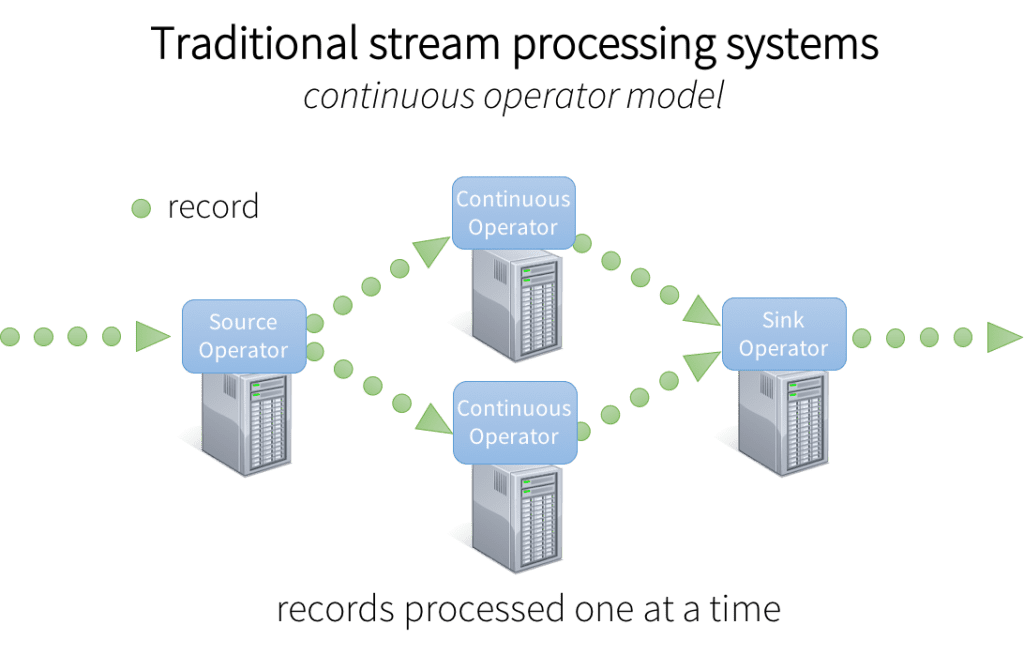

**Source**: https://databricks.com/blog/2015/07/30/diving-into-apache-spark-streamings-execution-model.html



## Problems with the one-at-a-time approach
However, consider how a Twitter feed about a particular hashtag behaves. It can be relatively quiet at some times, and frenetic at others. It's what we call **bursty** &mdash; the data arrival rate is highly variable. Building processing infrastructure big enough to handle the *busiest* periods is not cost-effective when the *average* data rates are much lower means the hardware would be idle much of the time. The solution is to cache the incoming data, so it doesn't overwhelm the receiving system, but ensures we don't lose any of it. This introduces latency, but in most applications a little latency is acceptable, so if we're okay with the processing catching up to real-time again only when the burst ends, this works. To add this caching, we typically put a queuing system such as Apache Kafka (https://kafka.apache.org/) in between the source and the processing engine (for our purposes, that engine being Spark). We will cover more about Kafka later in the course.

The one-at-a-time model though, even with a stream queue, is not optimum for the processing engine. Processing data in batch mode rather than one-at-a-time is far more efficient, but can't be used for real-time streaming analytics. One-at-a-time has very low latency, but it is not well-suited to distributing work over a cluster of servers. It's fine if the processing can all take place on a single server, but the overhead of coordinating the work of many machines eliminates the advantage of having a cluster if you try to scale one-at-a-time across them. 

## Micro-batch processing
Spark adopted an approach that is in the sweet spot between batch and one-at-a-time when it comes to distributed computing.  Spark processes streaming data in **micro-batches**. It trades off some latency in return for enabling the big data throughput that a cluster is intended to provide. For most business applications, latency measured in seconds (vs. milliseconds for one-at-a-time) is good enough.

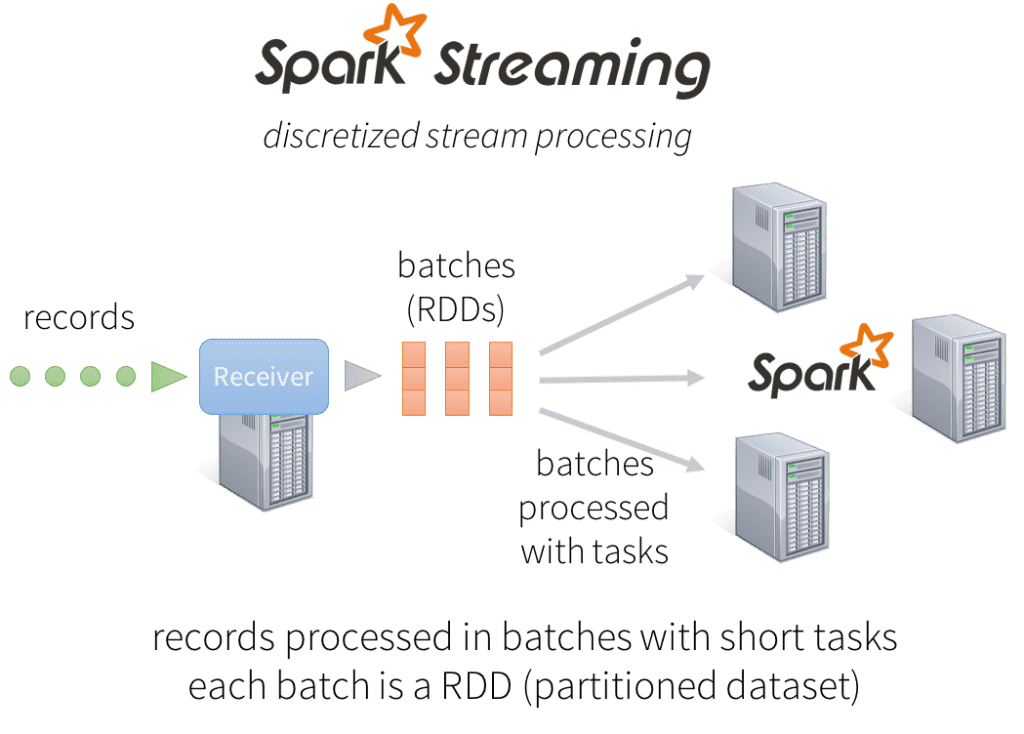

**Source**: https://databricks.com/blog/2015/07/30/diving-into-apache-spark-streamings-execution-model.html

# Spark Streaming

Spark Structured Streaming, the newest version of stream processing in Spark, provides:

1. **A common programming model for batch and stream processing**: Spark Streaming uses the same API (to the extent possible) for working with streaming data as it does for working with fixed-size DataFrames.<br><br>

2. **A general abstraction for stream processing**: Spark Streaming adopted a model for streams that encompasses processing everything in the data spectrum from static to periodic to non-stop real-time.<br><br>

3. **Fault tolerance**: Spark Streaming can continue a failed computation without losing data.<br><br>

4. **One-and-only-once guarantees**: Where reasonably possible, Spark Streaming guarantees that dataset rows will be processed once and only once.

The key abstraction that Spark Streaming uses is to extend the familiar concept of a table to one which is potentially unbounded (i.e. continually being appended to). Data scientists are comfortable working with tables so this is a natural abstraction to choose.  Spark DataFrames are essentially tables with built-in operations you can invoke, so using Spark Streaming involves only extending what you already know about working with DataFrames.

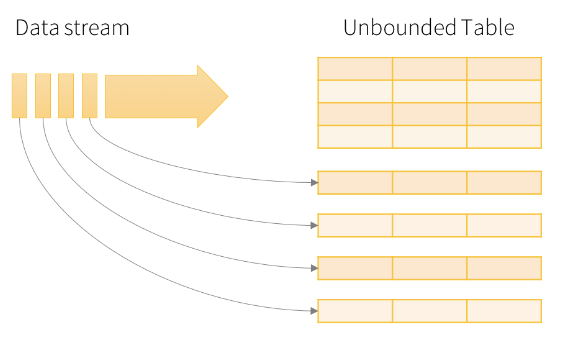

Source: https://www.databricks.com/spark/getting-started-with-apache-spark/streaming

The key question to consider is: How often do updates occur and how close to real-time do we really need for our application? Perhaps we want something in-between updating our dashboard in real-time and perhaps only once a day. To provide this kind of generality, Spark Streaming introduced the idea of a **triggering  policy**. Developers specify triggering policies that will determine when Spark updates the results, either with a particular periodicity, or when an event occurs, such as the arrival of enough new records to form a micro-batch (which is what we would want for near-realtime processing).

Specifying transformations is done in the same way as for non-streaming DataFrames, using the DataFrames' built-in methods (i.e. its API) or by using Spark SQL queries. Most of the operations available for fixed-size tables are available, but a few that can't be computed with acceptable performance are not.

The resulting output can be written to any kind of filesystem or database Spark knows how to write to. Spark Streaming will, if possible, perform the processing incrementally so it minimizes having to pass over the entire input every time. To control its output behaviour, Spark Streaming provides three modes for writing out the results of an update. Conceptually, Spark Streaming produces a new output table when a trigger occurs. This table isn't actually outputted (or even materialized) unless the "complete mode" option of the three options below is chosen: 

1. **Append mode**: Only new rows appended to the output table since the last trigger are actually outputted. This is an appropriate mode when data computed in prior updates are considered immutable. It avoids moving around data that hasn't changed, which is always a good thing when the data is big.<br><br>

2. **Update mode**: Only the rows in the output table that changed are actually outputted. These output rows would typically then be used to do in-place updates in a relational table or where you are only interested in what has changed.<br><br>

3. **Complete mode**: The entire updated output table is actually outputted. This may be appropriate if the output table is small or will mostly change on every update.

## Developing and running Structured Streaming queries

There are five steps to creating a Structured Streaming query: (1) specifying the sources of the streaming inputs, (2) the transformations that you want to take place, (3) the destinations of the outputs, (4) the timing of the processing, and (5) setting the process in motion.  Let's look at each of these in turn.

### Defining inputs
To read a streaming source we use spark.readStream to create a DataStreamReader (rather than using spark.read which creates a non-streaming DataFrameReader).  DataStreamReader has most of the same methods as DataFrameReader.

There are several built-in sources that are particularly useful:

- **File source**: Reads text, CSV, JSON, ORC, or Parquet files as a stream of data. (ORC and Parquet files are column-oriented storage formats). If several files are provided they will be processed in the order of file modification time which helps maintain the time ordering of updates. If latestFirst is set, the order will be reversed.

- **Kafka source**: Reads data from Kafka.

- **Socket source**: Reads UTF8 text data from a socket connection. The listening server socket is at the driver (not in the cluster). Note that this should be used only for testing as this does not provide end-to-end fault-tolerance guarantees.

- **Rate source**: Generates data at a rate of the specified number of rows per second. Each output row contains a timestamp and a value. This source is intended for testing and benchmarking.

- **Rate Per Micro-Batch source**: Generates data at a rate of the specified number of rows per micro-batch. Each output row contains a timestamp and value. The Timestamp is of type Timestamp and contains the time of message dispatch, and the value is a Long integer containing the message count, starting from 0 as the first row. Unlike the rate data source, this data source provides a consistent set of input rows per micro-batch regardless of the query execution (configuration of trigger, query being laggy, etc.). This source is also intended for testing and benchmarking.

Here are some examples:

In [ ]:
spark = SparkSession. ...

# Read text from socket
socketDF = spark \
    .readStream \
    .format("socket") \
    .option("host", "localhost") \
    .option("port", 9999) \
    .load()

socketDF.isStreaming()    # Returns True for DataFrames that have streaming sources

socketDF.printSchema()

# Read all the csv files written atomically in a directory
userSchema = StructType().add("name", "string").add("age", "integer")
csvDF = spark \
    .readStream \
    .option("sep", ";") \
    .schema(userSchema) \
    .csv("/path/to/directory")  # Equivalent to format("csv").load("/path/to/directory")

Note that the above examples generate *untyped* streaming DataFrames, meaning that the schema of the DataFrame is not checked at compile time.  It is only checked at runtime, when the query is submitted. Some operations like map, flatMap, etc. need the type to be known at compile time. You can convert these untyped streaming DataFrames to typed streaming Datasets using the same methods as for a non-streaming DataFrame. You can also create streaming DataFrames from tables with DataStreamReader.table().

### Defining transformations
Now we can apply transformations in the same way we would with a static Spark DataFrame.  We need to make a distinction however between *stateless* and *stateful* transformations.

Stateless transformations such as select(), map() and filter() operate independently on each row of a DataFrame.  Each row of the table can be processed without requiring any information from any other row.  For these, the streaming methods work the same as the batch methods.

Stateful transformations such as count(), sum(), distinct() require information from other or even all rows.  Whether they are supported or not depends primarily on whether they can be calculated incrementally e.g. sum, where we can simply add the values arriving to a running total, or not e.g. distinct, where we need to look at *all* previous rows  (or at least keep and scan over a potentially very large list of previously-seen values) to tell whether we have seen a newly-arriving value any time in the past.  In some cases clever algorithms are known (e.g. for median) for approximating otherwise intractable aggregations.

### Defining outputs
Similarly to replacing spark.read with readStream, we replace DataFrame.write with writeStream.  However, we need to specify which of the three output modes (defined above) we wish to use (unless we want the default *append* mode).  The following example will count the number of occurrences of each word arriving in a stream from http://localhhost:9999 and print the current total in the terminal/console window whenever there's a change. The awaitTermination() prevents the process from exiting while the query is active.

In [ ]:
# Create DataFrame representing the stream of input lines from connection to localhost:9999
lines = spark \
    .readStream \
    .format("socket") \
    .option("host", "localhost") \
    .option("port", 9999) \
    .load()

# Split the lines into words
words = lines.select(
   explode(
       split(lines.value, " ")
   ).alias("word")
)

# Generate running word count
wordCounts = words.groupBy("word").count()

# Start running the query that prints the running counts to the console
query = wordCounts \
    .writeStream \
    .outputMode("complete") \
    .format("console") \
    .start()

query.awaitTermination()

### Specifying the trigger rules
The last thing we need to do to complete the specification of the computation is to define what will trigger it, and optionally where we want intermediate results to be saved if we need failure recovery with only-once delivery guarantees.

There are five options:

- **Default**: The query will run a micro-batch as soon as the previous micro-batch has completed.
- **ProcessingTime**: Specify a time interval between processing of micro-batches.
- **Once**: The query will process all new data available in a single batch then stops.  This is useful if you are using an external scheduler or only want to update upon request.  For example you may want to spin up a cluster to  process everything that is available since the last period, and then shut it down again.
- **Available-now**: Similar to the Once trigger, the query will process all the available data and then stop on its own, but it will process the data in (possibly) multiple micro-batches based on the source options, which will result in better query scalability.
- **Continuous**: This is a new experimental continuous processing mode.  See https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html#continuous-processing for the latest details.

Here are examples of how to set these all up:

In [ ]:
# Default trigger (runs micro-batch as soon as it can)
df.writeStream \
  .format("console") \
  .start()

# ProcessingTime trigger with two-seconds micro-batch interval
df.writeStream \
  .format("console") \
  .trigger(processingTime='2 seconds') \
  .start()

# One-time trigger
df.writeStream \
  .format("console") \
  .trigger(once=True) \
  .start()

# Available-now trigger
df.writeStream \
  .format("console") \
  .trigger(availableNow=True) \
  .start()

# Continuous trigger with one-second checkpointing interval
df.writeStream
  .format("console")
  .trigger(continuous='1 second')
  .start()

If your computation is stateful, you will also need to specify a checkpoint location to store the state to so that the query can be restarted where it left off should it fail.  Without this, the entire stream from the beginning would need to be reprocessed to recover.

In [ ]:
# Configure checkpoint location
.option("checkpointLocation", directory_to_save_to)

### Running the query
We can then set the query running using .start() which returns an object representing the running query.  The .start() method is non-blocking, which means it returns immediately and runs the query in the background.  We can use the returned object's methods (.id(), .name(), .stop(), etc.) to manage the query once it's running:  

In [ ]:
query = df.writeStream.format("console").start()   # get the query object

query.id()          # get the unique identifier of the running query that persists across restarts from checkpoint data

query.runId()       # get the unique id of this run of the query, which will be generated at every start/restart

query.name()        # get the name of the auto-generated or user-specified name

query.explain()   # print detailed explanations of the query

query.stop()      # stop the query

query.awaitTermination()   # block until query is terminated, with stop() or with error

query.exception()       # the exception if the query has been terminated with error

query.recentProgress  # a list of the most recent progress updates for this query

query.lastProgress    # the most recent progress update of this streaming query

Here's what happens once you initiate a query.

First, the DataFrame operations are converted to a logical plan in the same form that Spark SQL uses.  The Spark SQL engine then analyzes and optimizes the plan to be sure it can be executed efficiently and incrementally.  It may shift the order of operations where the result would be the same but would require less memory or computation.

Spark SQL then initiates a background thread that runs the query.  The thread wakes up and checks for incoming data periodically, according to your specifed triggering schedule.  The first time it finds that data is available, an optimized Spark execution plan is generated from the logical plan, and processing of micro-batches commences, writing to the output according to your specified output mode.  If the computation is stateful, the state is saved to the specified checkpoint directory after each micro-batch is processed.  The thread continues to run, following the triggering schedule, until it is stopped by calling .stop() on the query object (or it fails).

You can check on the progress of the running query using the .status() or .lastProgress() methods which can be used to get information about whether the thread is running and how the processing is going.

## Exercise 1

Let's look at an example of how to create and run a Structured Streaming query: 

- https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/2799933550853697/490651759058058/2202577924924539/latest.html


## Exactly-once guarantees
Exactly-once guarantees are critical for ensuring that the results of the computations are correct, especially in the event of a failure and restart during a computation.

Structured Streaming can provide guarantees that each input record will be processed once and only once.  This is much more difficult to achieve than you might assume.  It is only possible when three conditions are all met:

- **Replayable streaming sources**: It must be possible for the source to resend the last micro-batch during which a failure occurs.
- **Deterministic computations**: All of the transformations must always produce the same result when run repeatedly.
- **Idempotent streaming sink**: The sink (where the data is written to) must be able to identify and ignore duplicate writes if and when they occur during a restart.

Note that this does not guarantee that upstream data sources are only-once.  If the sources do not have only-once guarantees as well they may send the same data more than once, so care must be taken to ensure the entire pipeline has appropriate guarantees.  We will return to this in a later module.

## Custom sources and sinks
You can also work with other data sources and destinations than those that have built-in support in Structured Streaming.  Two methods are provided: .foreach() which allows you to write custom logic to be executed for each data row, and .foreachBatch() which allows for arbitrary logic on the output of each micro-batch. Use .foreachBatch() for these use cases:
- **Reusing existing batch data sources**: if there is no streaming sink available for your storage system but there is Spark data writer for batch queries. Use foreachBatch to write the output of each micro-batch using the batch data writer.
- **Writing to multiple locations**: if you want to write the output of a streaming query to multiple locations but want to avoid the transformations being repeated for each output location. To avoid recomputations, you should cache the output DataFrame/Dataset, write it to multiple locations, and then uncache it.
- **Applying additional DataFrame operations**: if you want to do an operation that is not supported already supported by Structured Streaming. You must very careful though that it is a kind of operation that can be computed incrementally and efficiently.

In [ ]:
def foreach_batch_function(df, epoch_id):
    # Transform and write batchDF
    # Your logic goes here
  
streamingDF.writeStream.foreachBatch(foreach_batch_function).start()  

## Transformations

### Stateless Transformations
All projection operations (e.g. select(), map(), flatMap()) and selection operations (e.g. filter(), where()) process one record at a time and are therefore stateless.  For these operations we can be comfortable that the processing will be efficient and not require state cacheing.  Unfortunately, it also means that these operations may not reduce the volume of data they output relative to what they receive as input.  As a result, complete mode is not supported for these operations as they may generate unbounded outputs over time.

### Stateful Transformations
Aggregations are stateful as their result depends on more than one input record.  Statistics are by definition a function of many data observations and so are also stateful computations.  Spark maintains the state of the computation in the memory of the Spark executors so that updating it is fast, but checkpoints it to disk to allow for fast recovery in the event of a failure.  Spark manages the distribution and coordination of state updates for us.

Stateful operations fall into two categories: *managed* and *unmanaged*.  Managed stateful operations will have their stale state data automatically cleaned up for you by Structured Streaming.  Unmanaged operations allow you to define your own arbitrary stateful operations so the cleanup needs to also be defined by you.

#### Stateful Streaming Aggregations

Use .groupBy() to do aggregations, either with no argument to aggregate over all rows, or the value of a key as the argument to aggregate over a subset of the rows.  Built-in aggregations include .count(), .mean(), .stddev(), countDistinct(), etc. and are used the same way as Spark SQL aggregation functions.  See https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/grouping.html for the full list.  The .agg() method is useful if you want to do multiple aggregations.  Windowing functions (https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/window.html) are particularly helpful if you want to window the streams in some way, such as by time period.  Stateful streaming aggregations that are time-windowed can use all three output modes.

#### Watermarks
Since streaming data often has some latency, it is useful to be able to specify a trailing time window during which late-arriving data will be accepted.  This trailing time period is know as the *watermark delay*.  It is useful if we are aggregating by time period or some other key that we only expect to arrive within a particular time window, but we want to be reasonably sure all of the data has arrived before we do the aggregation of the records with that key.  To add a watermark, use .withWatermark() with the key and time period as arguments.

Note that although watermarks guarantee that data arrives during the watermark delay period *will* be processed, they don't guarantee that data that arrives later than that *will not* be processed.  It may or may not depending on the exact timing of arrival of the late record and when the last micro-batch processing is triggered.

### Streaming Joins

#### Stream-static joins
Let's first consider the situation where you want to join a stream to an existing static Dataset.  For example, you may have a stream of codes arriving such as stock tickers where you need to join them with static information about the corresponding companies.  We will need to open the stream using .readStream() and the Dataset (or DataFrame) using .read().  Then you can call .join() on the stream with two arguments: the reader you opened for the static dataset and the key to do the join on.  Structured Streaming supports inner, left outer and right outer joins for the stream-static combination.  Other types of joins are not supported as they cannot in general be run incrementally.

Stream-static joins are stateless so they do not require watermarking.

The static Dataset will be read many times so it may be useful to cache it for performance.

If the static Dataset isn't really static, and can change, the behaviour will depend on the details of what the underlying data source is.

#### Stream-stream joins
Things become more complicated if we need to join two data streams.  Matching events can arrive from either stream in any order, with potentially arbitrary delays.  To make this work Structured Streaming must continually buffer and check for matches as new data is received.  This is handled automatically, and can be watermarked to limit how much grace period is afforded late data.  Although watermarks and event-time constraints aren't strictly required for stream-stream inner joins, they are both required to allow for automatic state cleanup.

Outer joins are also supported, but then the watermarks and event-time constraints become mandatory.  Without them, Spark would be unable to tell when to decide that a match will never occur and to assign NULLs to the missing fields. The generation of the outer NULL results can't take place until the window end and watermark period has expired on both streams. Since both the watermarks and event-time constraints are required for outer joins, Structured Streaming is able to do automatic state cleanup for them.

### Arbitrary stateful computations
Python support for arbitrary stateful computations is new in Spark 3.4.0 and is described here https://www.databricks.com/blog/2022/10/18/python-arbitrary-stateful-processing-structured-streaming.html

## Exercise 2
Take a look at how to work with stream-to-stream joins:
https://docs.databricks.com/_static/notebooks/stream-stream-joins-python.html

**End of Module**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

When you are comfortable with the content, you may proceed to the next module.

# References


* Structured Streaming Programming Guide (n.d.): https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html


* Spark Streaming Guide (n.d.): https://spark.apache.org/docs/latest/streaming-programming-guide.html


* Kleppmann, M. (2017). Chapter 11: Stream Processing in *Designing Data-Intensive Applications*. https://www.oreilly.com/library/view/designing-data-intensive-applications/9781491903063/.


* Damji, J. S., Wenig, B., Das, T., &amp; Lee, D. G.-Y. (2020). Chapter 8. In Learning spark: Lightning-fast big data analytics (2nd Edition). essay, O'Reilly. 


* Perrin, J.-G., &amp; Thomas, R. (2020). Chapter 10. In Spark in action. essay, Manning. 